<a href="https://colab.research.google.com/github/vinybrasil/teoria_matematica/blob/master/edo_python/tcc_homogeneo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.linalg as la
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math
import random



In [2]:
def preco_lp(m, psi, y, teta, i_ext):
    return m-psi*y+teta*i_ext

def cambio_lp(b0, b1, m, psi,b2,y,teta, i_ext,p_ext):
    #return  (-(b0/b1))+m+y*((1-psi*b2)/b1)+((teta*b1 + b2)/b1)*i_ext
    #colocar o p_ext se tiver
    return ((-1/b1)*b0)+m+ (1/b1)*y - psi*y  + (teta+(b2/b1))*i_ext - p_ext

In [5]:
#parametros:

psi = 0.05
teta = 0.5
b1 = 20
b2 = 0.1
mi = 0.01

#variaveis exogenas:

m0 = 100
b0 = 500
yn = 2000
i_ext = 3
p_ext = 0

In [23]:
plp_m0 = preco_lp(m, psi, y, teta, i_ext)
clp_m0 = cambio_lp(b0, b1, m, psi,b2,y,teta, i_ext,p_ext)

In [6]:
A = np.array([[-mi*(b1+b2/teta), mi*b1],[1/teta, 0]])

In [8]:
autocoisas = np.linalg.eig(A)
autocoisas

(array([-0.74146936,  0.53946936]), array([[-0.34761472, -0.26042708],
        [ 0.93763746, -0.96549352]]))

In [44]:
x_novo = np.arange(-100,100,4)
len(x_novo)

50

In [10]:
#autovetor estável
eigvector_1 = autocoisas[1][:,0]
eigvector_1

array([-0.34761472,  0.93763746])

In [11]:
m = eigvector_1[0]/eigvector_1[1]
m #m do autovetor estável

-0.370734679571092

In [12]:
#autovetor instavel
eigvector_2 = autocoisas[1][:,1] 
n = eigvector_2[0]/eigvector_2[1]
n

0.2697346795710921

In [80]:
y_estavel = [] #ta faltando a parte que shift ele para a esquerda
#for i in x_novo:
#  y_estavel.append(i*m)
for i in x_novo:
  #y_estavel.append(i*autocoisas[0][0]) nao deu boa
  y = (i/(teta * autocoisas[0][0])) #- plp_m0/(b1 * autocoisas[0][0])
  y_estavel.append(y)

In [81]:
y_instavel = []
for i in x_novo:
  #y_instavel.append(i*n)
  y = (i/(teta * autocoisas[0][1]))
  #y_instavel.append(i*autocoisas[0][1])
  y_instavel.append(y)

In [67]:
#def function(z, t, mi, b1, b2, teta, clp, plp):
def function(z, t):
    x, y = z

    #dxdt = -mi*b1*x + mi*b1*plp - (mi*b2*x)*(1/teta) + (mi*b2*plp)*(1/teta) + mi*b1*y - mi*b1*clp
    #dydt = (x/teta) - (plp/teta)

    #supondo sistema homogeneo
    dxdt = -0.01*20*x - (0.01*0.1*x)*(1/0.5)  + 0.01*20*y 
    dydt = (x/0.5) 
    
    return [dxdt, dydt] 

In [102]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)

NI, NJ = X.shape 
u, v = np.zeros(X.shape), np.zeros(Y.shape)
t = 0

for i in range(NI):
    for j in range(NJ):
        x = X[i, j]
        y = Y[i, j]
        #yprime = function([x, y],t, mi, b1, b2, teta, clp_m0, plp_m0)
        yprime = function([x, y],t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]

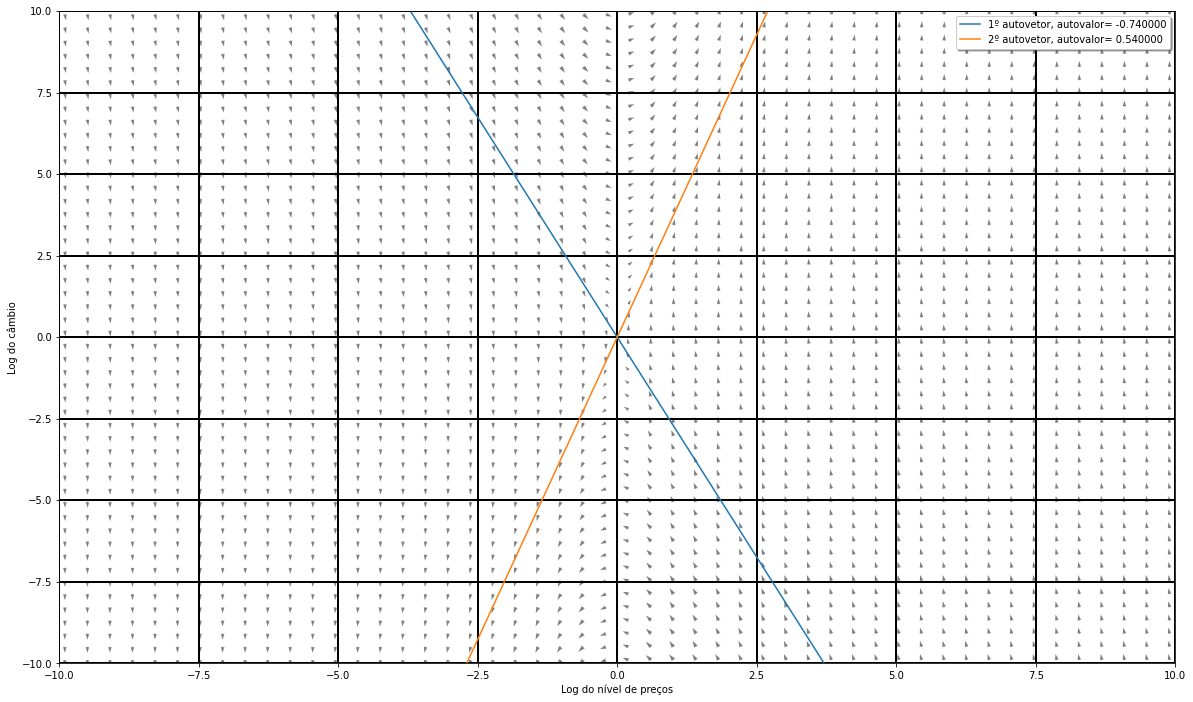

In [103]:
fig= plt.figure(figsize=(20,12))
#Q = plt.quiver(X, Y, u, v, color='r')
u = u / np.sqrt(u**2 + v**2);
v = v / np.sqrt(u**2 + v**2);

Q = plt.quiver(X, Y,  u, v, color='gray', scale=None, scale_units='inches')
plt.xlabel('Log do nível de preços')
plt.ylabel('Log do câmbio')

plt.grid(c='black', linestyle='-', linewidth=2)

plt.plot(x_novo, y_estavel, label='1º autovetor, autovalor= %f' % round(autocoisas[0][0],2))        #plotando o primeiro autovetor
plt.plot(x_novo, y_instavel, label='2º autovetor, autovalor= %f' % round(autocoisas[0][1],2))      #plotando o segundo autovetor

#plt.plot(x_novo, y_zada, label='dx/dt = 0')        #onde a eq é zero
#plt.plot(x_novo, y_zada_2, label='dydx = 0')      #onde a eq é zero
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.legend(loc='best', shadow=True, facecolor='white')
plt.savefig('phase-portrait.png')